In [59]:
#import the library 
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns 

In [60]:
#import the data set 
data = pd.read_csv("austin_weather.csv")
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [61]:
useless_C = ["Date","SeaLevelPressureLowInches","Events"]
data_1 = data.drop(useless_C,axis = 1, inplace = True )

In [62]:
data.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,T


In [63]:
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0


In [64]:
data = data.replace("T",0.0)

In [65]:
data = data.replace("-",0.0)

In [66]:
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0


In [67]:
data.to_csv("rainfall.csv")

In [68]:
#import the final csv 
data_rain =  pd.read_csv("rainfall.csv")

In [69]:
x= data_rain.drop(["PrecipitationSumInches"],axis =1)
y = data_rain["PrecipitationSumInches"]

In [70]:
# reshape in 2D
y = y.values.reshape(-1,1)
y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [71]:
day_index = 798
days =[i for i in range(y.size)]


In [72]:
# initallise the linear regrassion classifier 
clf = LinearRegression()
# train the data
clf.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Precepitation trend graph :


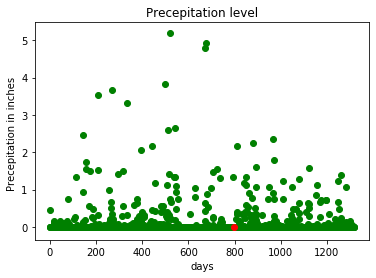

In [78]:
print("Precepitation trend graph :")
plt.scatter(days, y, color = "g")
plt.scatter(days[day_index],y[day_index],color = "r")
plt.title("Precepitation level")
plt.xlabel("days")
plt.ylabel("Precepitation in inches ")
plt.show()

In [93]:
x_vis = x.filter(["TempAvgF","DewPointAvgF","HumidityAvgPercent","SeaLevelPressureAvgInches","VisibilityAvgMiles","WindAvgMPH"])

Precepitation vs attribute trend 


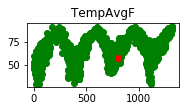

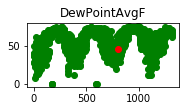

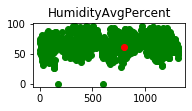

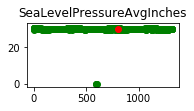

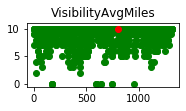

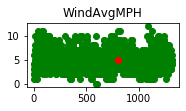

In [94]:
print("Precepitation vs attribute trend ")

for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days,x_vis[x_vis.columns.values[i][:100]],color ="g")
    plt.scatter(days[day_index],x_vis[x_vis.columns.values[i]][day_index], color = "r")
    plt.title(x_vis.columns.values[i])
    plt.show()
    